Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


Dataset Size: (100, 2)
          x         y
0  0.191885  0.174697
1  0.027076  0.098719
2  0.117530  0.209008
3  0.173476  0.075840
Centroids: 
[0.8924614795351706, 0.44299156896881414, 0.7584176260448832, 0.3896065159721525] [0.8005706094982953, 0.4708727861139604, 0.9852159427873427, 0.29852555326272456]


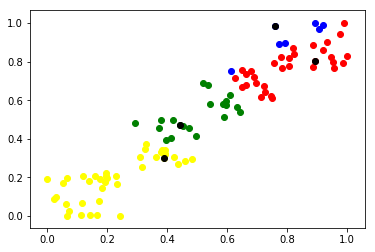

Iteration Number: 1
Error: 17.3203511695767 Squared Error: 4.353894484009603
Centroids: 
[0.8090984760067702, 0.503544822636568, 0.8088219554458533, 0.22745643139112887] [0.7729577358693724, 0.5263154199716913, 0.9255592870260226, 0.19497287712899714]


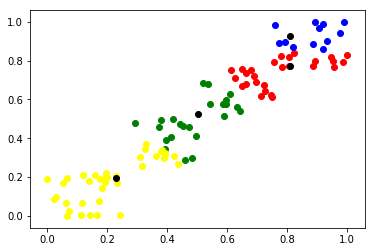

Iteration Number: 2
Error: 13.720026218851459 Squared Error: 2.275505225793424
Centroids: 
[0.7769364300596735, 0.4960306896511472, 0.881301775727203, 0.20994491836177162] [0.7417158663172315, 0.4991367469161803, 0.9322695138697356, 0.18573667509667774]


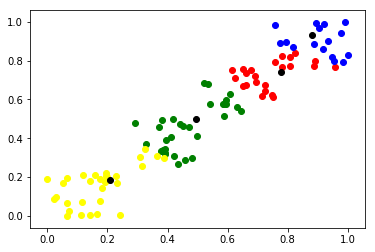

Iteration Number: 3
Error: 12.786423267165617 Squared Error: 1.9779198104666633
Centroids: 
[0.7430043892899003, 0.47223408213818385, 0.9039877479168699, 0.16778139949097948] [0.7297559316609067, 0.45944966282108324, 0.9018235080500766, 0.15361997857039403]


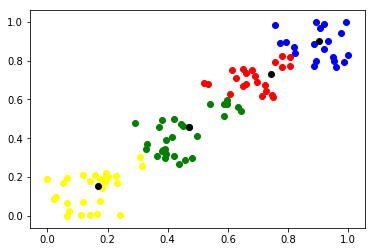

Iteration Number: 4
Error: 11.550052437576635 Squared Error: 1.6000352444813897
Centroids: 
[0.6905571346282686, 0.45336089240021965, 0.901265118770767, 0.14643912776691284] [0.7091642511401646, 0.42586016756686246, 0.8801960796645798, 0.13547782031924183]


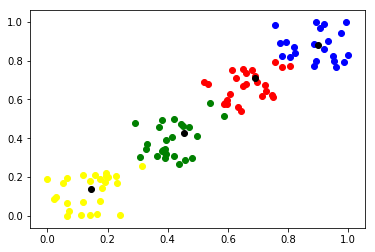

Iteration Number: 5
Error: 10.527865335142215 Squared Error: 1.301545047089028
Centroids: 
[0.6633432466300753, 0.4122562885944712, 0.8915722624313914, 0.14020868315468765] [0.6690625261535899, 0.3873801759652353, 0.8747146110839701, 0.12899499087041116]


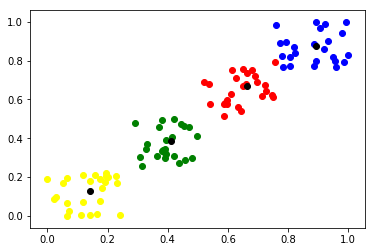

Iteration Number: 6
Error: 9.683612208783666 Squared Error: 1.0710757646284512
Centroids: 
[0.6457203749783635, 0.39615566938186986, 0.8834503690753186, 0.13320692438235443] [0.6517857328347904, 0.36932257972265264, 0.8660940876477524, 0.12397399245002244]


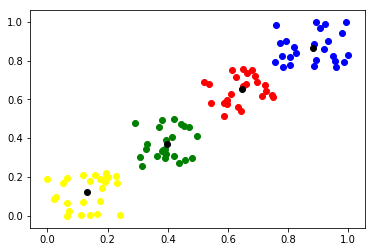

Iteration Number: 7
Error: 9.5245766219317 Squared Error: 1.0252135003905367
Centroids: 
[0.6412623078953203, 0.39615566938186986, 0.8783992363944836, 0.13320692438235443] [0.6462213712285134, 0.36932257972265264, 0.8630861150615108, 0.12397399245002244]


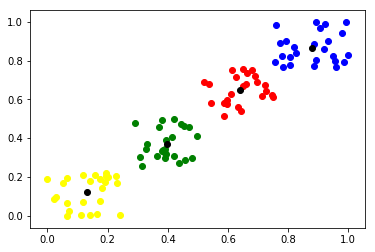

Iteration Number: 8
Error: 9.52723180214657 Squared Error: 1.0230785423245041


In [6]:
%reset

import pandas as pd
import numpy as np
import random
import math
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
random.seed(5)

def getData(dataset_name):
    attribute_file_name = 'Data/'+dataset_name+".attribute"
    dataset_file_name = 'Data/'+dataset_name+".data"
    att = pd.read_csv(attribute_file_name,
                      delim_whitespace=True,
                     header = None)
    attributes = {rows[0]:rows[1] for _,rows in att.iterrows()}
    dataset = pd.read_csv(dataset_file_name,
                      names=list(attributes.keys()))
    if 'class' in attributes: 
        del attributes['class']; del dataset['class']
    return attributes, dataset



def dist(x1,x2, minkowski = 2):
    val = 0.0
#     print("In error: ",attributes)
    for att in attributes:
        if attributes[att]=='value':
            val += (x1[att] - x2[att])*(x1[att] - x2[att])
    val = math.sqrt(val)
    return val

def calculateError():
    error = 0
    sqrt_error = 0
    for i in range(len(dataset)):
        sqrt_error += dist(dataset.iloc[i], pd.DataFrame(centroids[cluster_index[i]],index=[0]))**2
        error += dist(dataset.iloc[i], pd.DataFrame(centroids[cluster_index[i]],index=[0]))
    print("Error:",error,"Squared Error:", sqrt_error)
    return sqrt_error

def assignCluster():
    flag = False
    for i in range(len(dataset)):
        min_val = math.inf
        min_idx = -1
        for j in range(len(centroids)):
            distance = dist(dataset.iloc[i], pd.DataFrame(centroids[j],index=[0]))
            if distance < min_val:
                min_val = distance
                min_idx = j
        if flag==False and cluster_index[i] != min_idx:
            print
            flag = True
        cluster_index[i] = min_idx
    return flag

def newCentroids():
    for i in range(len(centroids)):
        List = [j for j in range(len(dataset)) if cluster_index[j]==i]
#         print("Len:",len(List))
        clustered_data = dataset.iloc[List]
        if (len(clustered_data)>0):
            for column in dataset.columns:
                centroids[i][column] = clustered_data[column].mean()


def showGraph(loop_num):
    x = []
    y = []
    color = ["red","green", "blue", "yellow", "black"]
    for i in range(len(centroids)+1):
        x.append([])
        y.append([])
    for i in range(len(dataset)):
        x[cluster_index[i]].append(dataset.iloc[i]['x'])
        y[cluster_index[i]].append(dataset.iloc[i]['y'])
    for i in range(len(centroids)):
        x[len(centroids)].append(centroids[i]['x'])
        y[len(centroids)].append(centroids[i]['y'])
    for i in range(len(centroids)):
        plt.scatter(x[i],y[i],color=color[i])
    print("Centroids: ")
    print(x[-1],y[-1])
    
    plt.scatter(x[-1],y[-1],color="black")
    filename = "fig_"+str(loop_num)+".png"
#     print(filename)
    plt.savefig(filename)
    plt.show()


dataset_name = 'test'
k = 4

attributes, dataset = getData(dataset_name)
dataset = dataset.dropna()
print("Dataset Size:",dataset.shape)
min_max_scaler = MinMaxScaler()
value_attributes = [key for key,value in attributes.items() if value=='value']
dataset[value_attributes] = min_max_scaler.fit_transform(dataset[value_attributes])

print(dataset.head(4))

centroids = []
cluster_index = [-1]*len(dataset)
# print(cluster_index)
for i in range (k): 
    centroid = {}
    random_number = random.randint(0,len(dataset))
    for column in dataset.columns:
        centroid[column] = dataset.iloc[random_number][column]
    centroids.append(centroid)
loop_num = 0



while True:
    loop_num += 1
    continue_loop = assignCluster()
#     print(cluster_index)
    showGraph(loop_num)
    print("Iteration Number:",loop_num)
    newError = calculateError()
    newCentroids()
    if continue_loop == False or loop_num>20:
        break


In [ ]:
print(dataset.iloc[[1,2,4,10]])

In [ ]:
print(math.inf>=100000000)

In [ ]:
dataset.iloc[7]